# Example of measurement were plottr only can show one measuremnt at a time

In [1]:
import qcodes as qc
import time
import os
import numpy as np
from IPython.display import Image
from qcodes.tests.instrument_mocks import DummyChannelInstrument
from qcodes import load_or_create_experiment, initialise_database, initialise_or_create_database_at
from qcodes import Measurement
from qcodes.dataset.plotting import plot_by_id

In [2]:
db_file_path = os.path.join(os.getcwd(), 'plottr_test.db')
initialise_or_create_database_at(db_file_path)
exp = load_or_create_experiment(experiment_name='plotting',
                          sample_name="no sample")


In [3]:
ins_one = DummyChannelInstrument(name='ins_one')

In [4]:
ins_one.A.dummy_n_points(10)
ins_one.A.dummy_n_points_2(20)
ins_one.A.dummy_start(0)
ins_one.A.dummy_stop(100)



ins_one.B.dummy_n_points(10)
ins_one.B.dummy_n_points_2(20)
ins_one.B.dummy_start(0)
ins_one.B.dummy_stop(100)

Starting experimental run with id: 46. 


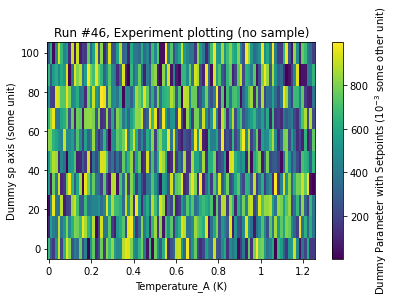

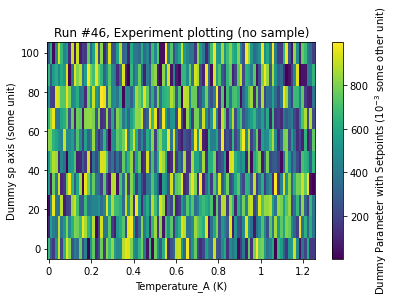

In [5]:
meas = Measurement()

meas.register_parameter(ins_one.A.temperature)
meas.register_parameter(ins_one.A.dummy_parameter_with_setpoints, setpoints=(ins_one.A.temperature,))
meas.register_parameter(ins_one.B.dummy_parameter_with_setpoints, setpoints=(ins_one.A.temperature,))

with meas.run() as datasaver:
    for temp in np.linspace(0, 1.25, 100):
        time.sleep(0.1)
        dummy = ins_one.A.dummy_parameter_with_setpoints.get()
        datasaver.add_result((ins_one.A.temperature, temp),
                             (ins_one.A.dummy_parameter_with_setpoints, dummy),(ins_one.B.dummy_parameter_with_setpoints, dummy))

plot = plot_by_id(datasaver.run_id)

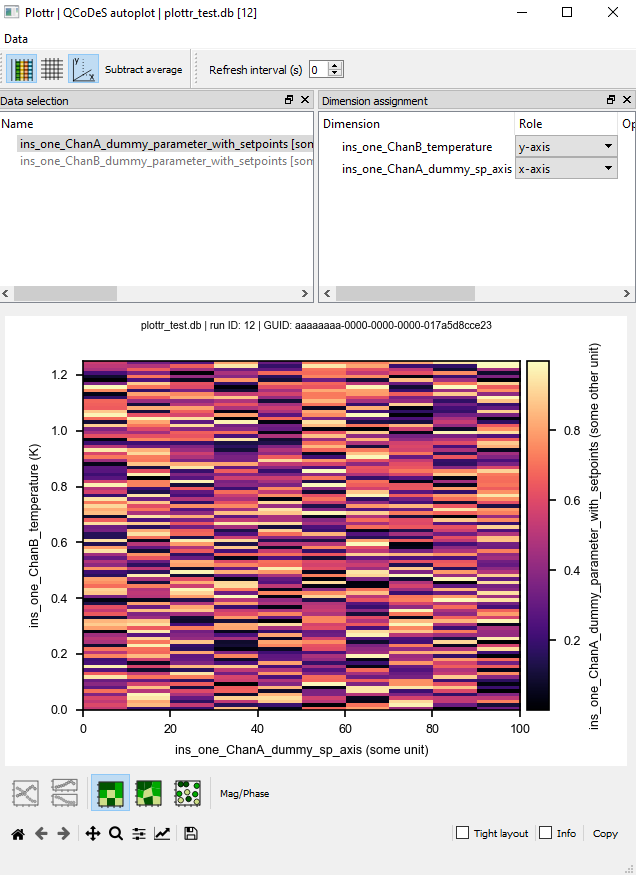

In [6]:
Image('PlottrOnlyOne.png')